In [1]:
# linear regression: 1. supervised machine learning algorithm
# 2. linear regression maps all data points to most optimized linear function
# 3. linear regression assume there is relationship between input data and output data meaning output changes at constant rate as the input changes.
# 4. the relationship is represented by straight line
# 5. inputs are independent variables and output is dependent variable
# 6. goal is find best-fit line
# 7. equation for best-fit line is y = mx + c
# 8. to find best-fit line the method we are using is least square method. the idea behind the method is to minimize sum of squared differences between actual values and predicted values from line.
# 9. interpretation of best-fit line: 1. slope (m) => how much y(independent variable) changes with each unit change in dependent variable(x)
# 2. intercept (b) => it represents the predicted value of y when x is 0.

# limitations: 1. the method assumes relationship between the variables is linear. if relationship is non-linear, linear regression might not work well.
# 2. outliers can significantly affect the slope and intercept, skewing the best-fit line.


# types of linear regression: 1. simple linear regression (y = mx + c) 2. multiple linear regression (y = c + m1x1 + m2x2 + ...)

# cost function for linear regression: measure how far the predicted values are from actual values. the most common cost function is mse (mean squared error). to minimize this cost we iteratively updates intercept and slop/weights until the mse reaches its lowest value.

# evaluation metrics for linear regression: 1. mean squared error (average of the squared differences between the actual values and predicted values)
# 2. mean absolute error: it is used to calculate accuracy of model(measure the average absolute difference between the predicted values and actual values)
# 3. root mean squared error (it describe how well the observed data points match the expected values)
# 4. coefficient of determination (r-squared): it indicates how much variation the developed model can explain or capture. it is always in the range of 0 to 1. the better the model matches the data, the greater the r-squared number. it is expressed as r^2 = 1 - (rss / tss)

# rss (residual sum of squares) = it is sum of difference between the output that was observed and what was anticipated.
# tss (total sum of squares) = the sum of data points error from the answer variables mean.

# regularization techniques for linear model
# 1. lasso regression (l1) = it adds a penalty term to the linear regression objective function to prevent overfitting.
# 2. reigid regression (l2) = it adds a penalty terms to linear regression equation. it is useful when dataset is multicollinearity. it aims to prevent overfitting.
# 3. elastic net regression = it is a hybrid regularization technique that combines the power of both l1 and l2 regularization.

In [6]:
import pandas as pd

df = pd.DataFrame(
    {
        "x(study hours)": [1, 2, 3, 4, 5],
        "y(exam scores)": [52, 55, 61, 66, 71]
    }
)
df

import numpy as np

x = np.array(
    df["x(study hours)"], dtype=float
)
y = np.array(
    df["y(exam scores)"], dtype=float
)

n = len(x)

In [9]:
def predict(x, m, b):
    return m * x + b

def cost_function_mse(y_true, y_pred):
    return (1 / n) * np.sum((y_true - y_pred) ** 2)

In [10]:
def gradients(x, y, m, b):
    y_pred = predict(x=x, m=m, b=b)

    dm = (-2 / n) * np.sum(x * (y - y_pred))
    db = (-2 / n) * np.sum(y - y_pred)

    return dm, db

In [34]:
loss_history = []
epochs = 10000
m = 0.0
b = 0.0
learning_rate = 0.01
for i in range(epochs):
    y_pred = predict(x, m, b)
    loss = cost_function_mse(y_true=y, y_pred=y_pred)
    loss_history.append(loss)
    dm, db = gradients(x=x, y=y, m=m, b=b)

    m = m - learning_rate * dm
    b = b - learning_rate * db

    if i % 100 == 0:
        print(f"epoch {i}: loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}")


print(f"final slope (m): {m}")
print(f"final intercept (b): {b}")


epoch 0: loss = 3769.4000, m = 3.8560, b = 1.2200
epoch 100: loss = 161.4680, m = 13.1122, b = 16.6514
epoch 200: loss = 82.2074, m = 10.7530, b = 25.1689
epoch 300: loss = 41.9457, m = 9.0715, b = 31.2395
epoch 400: loss = 21.4940, m = 7.8731, b = 35.5661
epoch 500: loss = 11.1052, m = 7.0190, b = 38.6497
epoch 600: loss = 5.8281, m = 6.4102, b = 40.8475
epoch 700: loss = 3.1474, m = 5.9764, b = 42.4139
epoch 800: loss = 1.7858, m = 5.6672, b = 43.5303
epoch 900: loss = 1.0941, m = 5.4468, b = 44.3260
epoch 1000: loss = 0.7427, m = 5.2897, b = 44.8931
epoch 1100: loss = 0.5643, m = 5.1777, b = 45.2973
epoch 1200: loss = 0.4736, m = 5.0980, b = 45.5853
epoch 1300: loss = 0.4275, m = 5.0411, b = 45.7906
epoch 1400: loss = 0.4042, m = 5.0006, b = 45.9370
epoch 1500: loss = 0.3923, m = 4.9717, b = 46.0413
epoch 1600: loss = 0.3862, m = 4.9511, b = 46.1156
epoch 1700: loss = 0.3832, m = 4.9364, b = 46.1686
epoch 1800: loss = 0.3816, m = 4.9259, b = 46.2063
epoch 1900: loss = 0.3808, m = 4.

In [35]:
y_pred = predict(x=5, m=4.9, b=46.3)
y_pred

70.8

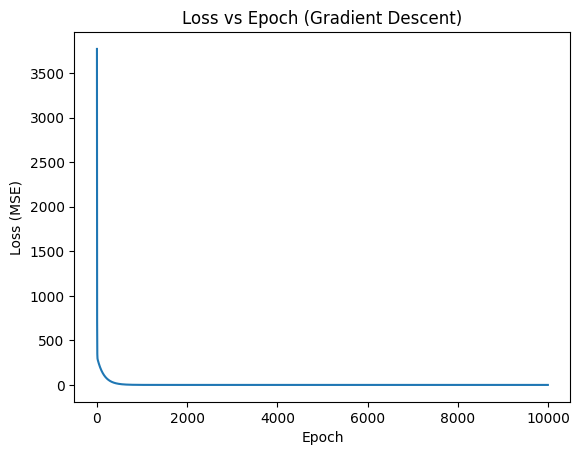

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epoch (Gradient Descent)")
plt.show()